In [1]:
from collections import defaultdict
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import seaborn as sns

data = pickle.load(open('processed_data.pickle', 'rb'))
labels = ['N', 'E', 'temperature_2m', 'relativehumidity_2m', 'apparent_temperature', 'rain', 'snowfall', 'pressure_msl', 'cloudcover', 'windspeed_10m', 'winddirection_10m', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
restructured_data = defaultdict(list)
station_ids = {}
for d in data:
    key = f"{d[0]}-{d[1]}"
    if key not in station_ids:
        station_ids[key] = len(station_ids)
    restructured_data[key].append([*d, len(restructured_data[key]), station_ids[key]])
df = pd.DataFrame(list(itertools.chain.from_iterable(restructured_data.values())), columns=[*labels, 'timestamp', 'station_id'])
station_ids = df.station_id.unique()
np.random.shuffle(station_ids)
df

,N,E,temperature_2m,relativehumidity_2m,apparent_temperature,rain,snowfall,pressure_msl,cloudcover,windspeed_10m,...,co,no,no2,o3,so2,pm2_5,pm10,nh3,timestamp,station_id
0,53.828389,22.348338,13.8,82,12.0,0.0,0.0,1012.7,13,13.6,...,243.66,0.22,3.17,52.21,1.55,4.10,5.03,1.87,0,0
1,53.828389,22.348338,15.2,78,13.7,0.0,0.0,1013.0,6,13.7,...,236.99,0.46,2.63,59.37,1.39,3.58,4.41,2.34,1,0
2,53.828389,22.348338,17.0,71,15.3,0.0,0.0,1013.1,4,14.8,...,233.65,0.62,2.51,62.23,1.59,4.09,4.95,2.91,2,0
3,53.828389,22.348338,18.6,63,16.9,0.0,0.0,1013.2,22,14.9,...,233.65,0.61,2.31,67.95,1.67,4.87,5.75,3.23,3,0
4,53.828389,22.348338,19.9,57,17.9,0.0,0.0,1012.9,28,16.3,...,226.97,0.26,1.32,87.26,1.10,3.48,4.08,2.31,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023,53.639793,22.470274,15.1,73,14.2,0.0,0.0,1014.6,14,7.2,...,250.34,0.00,4.97,52.93,1.19,9.23,10.70,3.26,16,286
6024,53.639793,22.470274,14.6,76,13.7,0.0,0.0,1014.4,2,7.3,...,257.02,0.00,5.06,48.64,1.21,10.81,12.42,2.79,17,286
6025,53.639793,22.470274,13.9,79,12.9,0.0,0.0,1014.4,4,8.0,...,260.35,0.00,5.14,44.70,1.13,12.31,14.04,2.44,18,286
6026,53.639793,22.470274,13.3,83,12.3,0.0,0.0,1014.3,4,8.6,...,257.02,0.00,4.88,41.84,0.94,13.14,14.89,2.18,19,286


In [2]:
print("Count of null")
df.isnull().sum()

Count of null


N                       0
E                       0
temperature_2m          0
relativehumidity_2m     0
apparent_temperature    0
rain                    0
snowfall                0
pressure_msl            0
cloudcover              0
windspeed_10m           0
winddirection_10m       0
co                      0
no                      0
no2                     0
o3                      0
so2                     0
pm2_5                   0
pm10                    0
nh3                     0
timestamp               0
station_id              0
dtype: int64

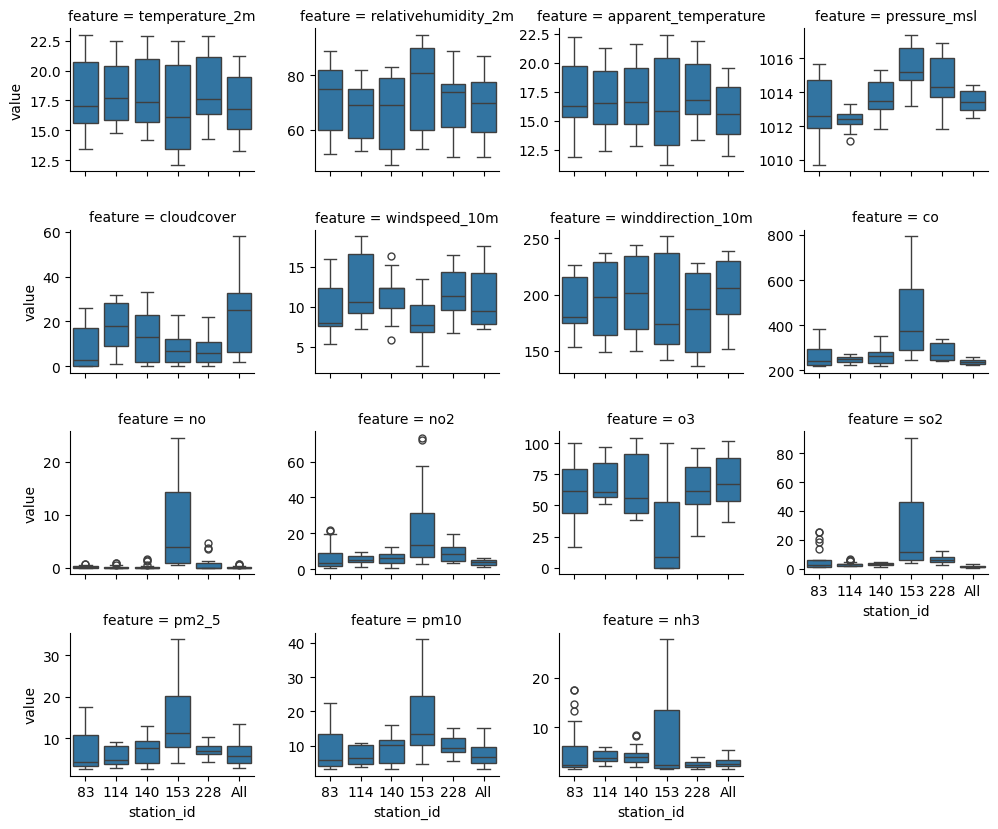

In [7]:
df_melt = df.melt(id_vars=['timestamp', 'station_id'], value_vars=df.columns, var_name='feature', value_name='value')
df_melt = pd.concat([df_melt, df_melt[df_melt.station_id == 0].assign(station_id="All")])
df_melt = df_melt[df_melt.station_id.isin(["All", *station_ids[:5]])]
df_melt = df_melt[~df_melt.feature.isin(["N", "E", "snowfall", "rain"])]
df_melt.reset_index(inplace=True)

sns.catplot(
    data=df_melt, kind="box", 
    x="station_id", y="value", col="feature", 
    col_wrap=4, sharey=False, 
    height=2.1, aspect=1.2
)
plt.show()

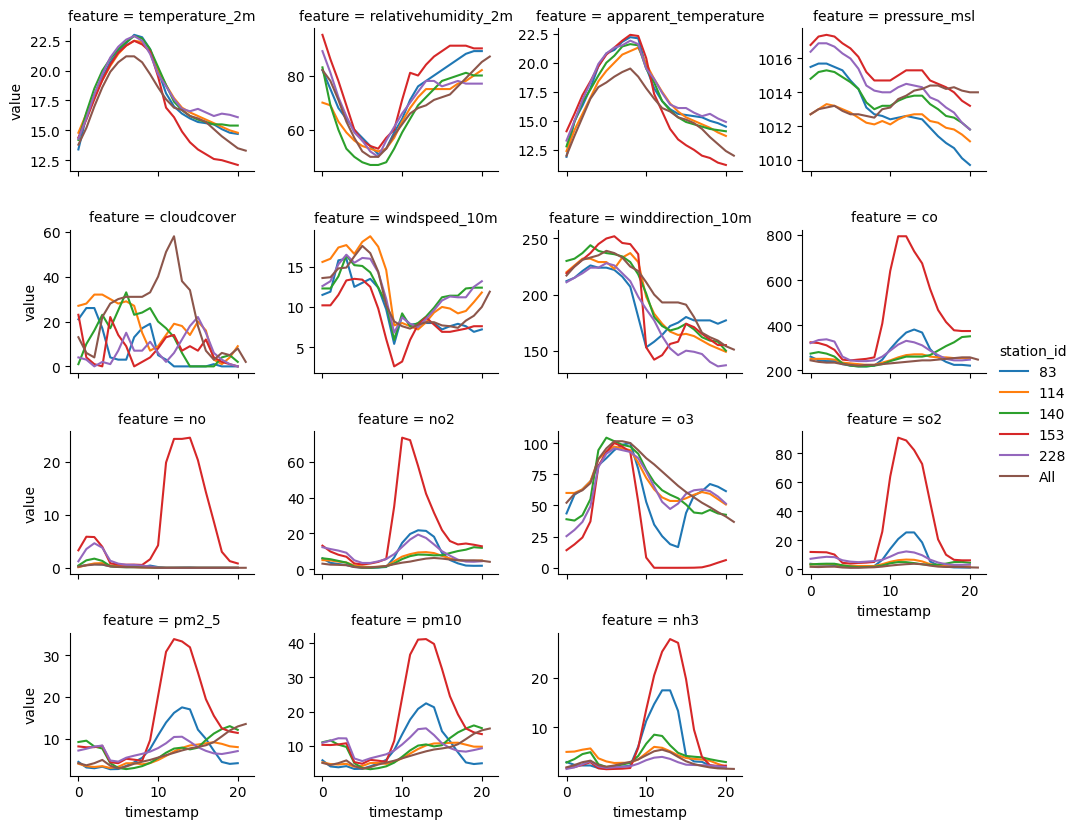

In [8]:
sns.relplot(
    data=df_melt, kind="line",
    x="timestamp", y="value", col="feature", hue="station_id",
    col_wrap=4,
    height=2.1, aspect=1.2,
    facet_kws=dict(sharey=False),
)
plt.show()

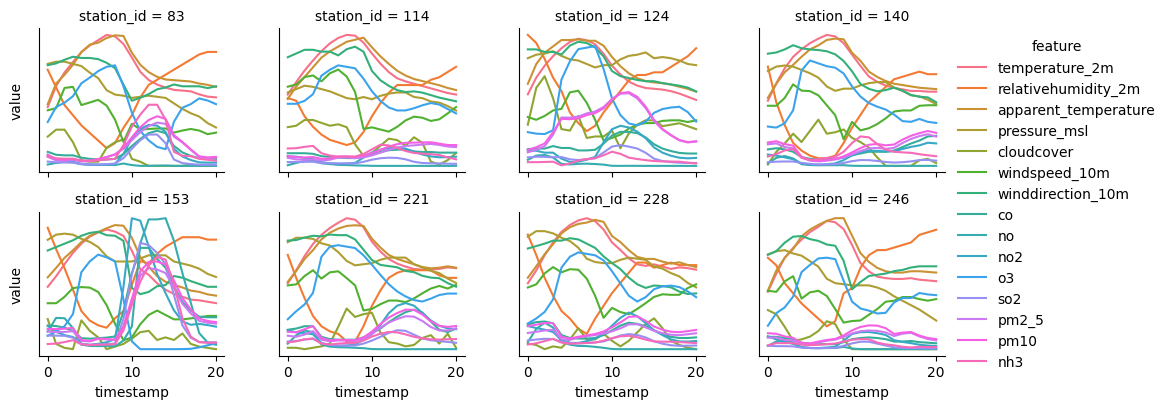

In [9]:
df_norm = df.copy()
for col in df_norm.columns:
    if col in ["N", "E", "station_id", "timestamp"]:
        continue
    df_norm[col] = (df_norm[col] - df_norm[col].min()) / (df_norm[col].max() - df_norm[col].min())
df_norm = df_norm[df_norm.station_id.isin(station_ids[:8])]
df_norm.drop(columns=["N", "E", "snowfall", "rain"], inplace=True)
df_norm = df_norm.melt(id_vars=['timestamp', 'station_id'], value_vars=df_norm.columns, var_name='feature', value_name='value')

g = sns.relplot(
    data=df_norm, kind="line",
    x="timestamp", y="value", col="station_id", hue="feature",
    col_wrap=4,
    height=2.1, aspect=1.2,
    facet_kws=dict(sharey=False)
)
g.set(yticklabels=[])
g.tick_params(left=False)
plt.show()

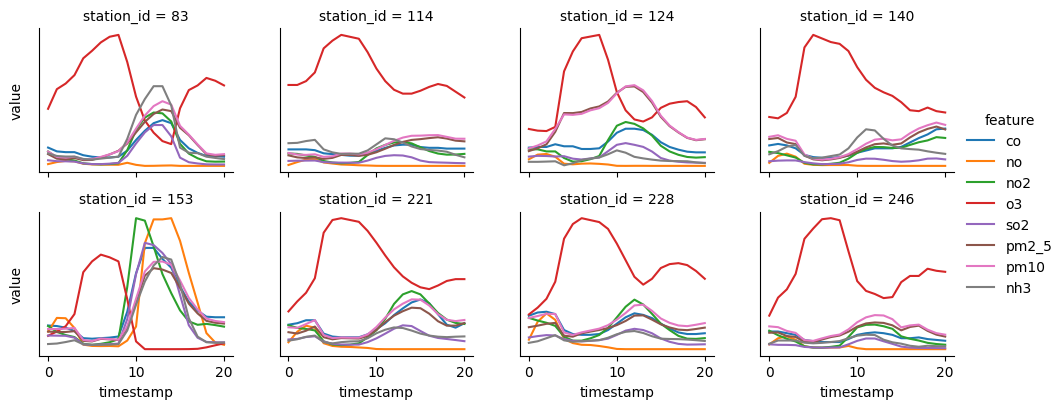

In [10]:
df_norm_copy = df_norm.copy()
df_norm_copy = df_norm_copy[df_norm_copy.feature.isin(["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"])]

g = sns.relplot(
    data=df_norm_copy, kind="line",
    x="timestamp", y="value", col="station_id", hue="feature",
    col_wrap=4,
    height=2.1, aspect=1.2,
    facet_kws=dict(sharey=False)
)
g.set(yticklabels=[])
g.tick_params(left=False)
plt.show()